# CLUSTERING
**Clustering techniques** are very powerful when you want to group data with similar characteristics together, but have no pre-specified labels. The main goal of clustering is to create clusters that have a high similarity between the data belonging to one cluster while aiming for minimal similarity between clusters. Most popular and widely-used clustering algorithms, **`K-means clustering`**, **`hierarchical agglomerative clustering`**, **`Semi-Supervised Learning and Look-Alike Models`**

The most common issue is one that is applicable to all forms of clustering -- we have no way of verifying if the results of the cluster analysis are correct or not! Always try to keep this in mind when working with clustering algorithms, and never make the mistake of treating the results of a cluster analysis as ground-truth.

You can quantify the performance of a clustering algorithm using metrics such as variance ratios

**K-Means Advantages**: Very easy to implement; With many features, k-means is usually faster than HAC; Objects are locked into the cluster they are first assigned to and can change as the centroids move around; Clusters are often tighter than those formed by HAC

**K-Means Disadvantages**: Quality of results depends on picking the right value for $k$, This can be a problem when we don't know how many clusters to expect in our dataset; Scaling our dataset will completely change the results; Initial start points of each centroid have a very strong impact on our final results. A bad start point can cause sub-optimal clusters

**HAC Advantages**: It produces an ordered relationship between clusters, which can be useful when visualized; Smaller clusters are created. This allows us to get a very granular understanding of our dataset, and zoom in at the level where the clusters make the most sense to us

**HAC Disadvantages**: Results are usually dependent upon the distance metric used; Objects can be grouped 'incorrectly' early on, with no way to relocate them. For instance, consider two points that belong to separate clusters, but are both nearer to each other than the center of the cluster they actually belong to (both are near the "boundary" between their cluster and the opposing cluster). These will be incorrectly grouped as a cluster, which will throw off the clustering of the groups they actually belong to, as well

## 1. K-Means Clustering

In [1]:
#Importing necessary libraries
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
#Creating our dataset using make_blobs() function
X, y = make_blobs(n_samples=400, n_features=2, centers=6, cluster_std=0.8)

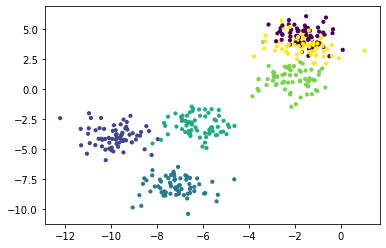

In [3]:
#Visualizing clusters of our new formed dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

The nice thing about creating a synthetic dataset with `make_blobs()` is that it can assign ground-truth clusters, which is why each of the clusters in the visualization above are colored differently. Because of this, we have a way to check the performance of our clustering results against the ground truth of the synthetic dataset. Note that this isn't something that we can do with real-world problems (because if we had labels, we'd likely use supervised learning instead!). However, when learning how to work with clustering algorithms, this provides a solid way for us to learn a bit more about how the algorithm

In [4]:
#Instantiate our model and set n_clusters=6
k_means = KMeans(n_clusters=6)

#Fit our model to the data stored in X
k_means.fit(X) #None

#Predict which clusters each data point belongs to
predicted_clusters = k_means.predict(X)

Now that we have the predicted clusters, let's visualize them and compare to the original data

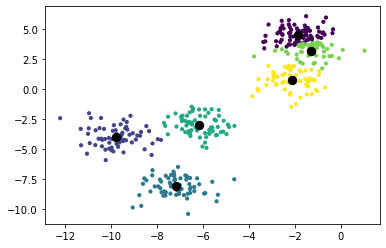

In [5]:
#
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10)

centers = k_means.cluster_centers_ #Creating cluster centers

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70)

> **In your opinion, do the centroids match up with the cluster centers? Yes - Centroid is at the center of all clusters**

In [6]:
#Tuning parameters
X_2, y_2 = make_blobs(n_samples=400, n_features=2, centers=np.random.randint(3, 8))

Now we've created a dataset, but we don't know how many clusters actually exist in this dataset, so we don't know what value to set for $k$!

In order to figure out the best value for $k$, we'll create a different version of the clustering algorithm for each potential value of $k$, and find the best one using an **_Elbow Plot_**.   

In the cell below, we instantiate and fit `KMeans` with a different value for `n_clusters` between 3 and 7, inclusive.

Then, store each of the objects in a list.

In [7]:
k_means_3 = KMeans(n_clusters=3).fit(X_2)
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [8]:
from sklearn.metrics import calinski_harabasz_score

>This is a metric used to judge how good our overall fit is. This score works by computing a ratio of between-cluster distance to inter-cluster distance. Intuitively, we can assume that good clusters will have smaller distances between the points in each cluster, and larger distances to the points in other clusters.

>Note that it's not a good idea to just exhaustively try every possible value for $k$. As $k$ grows, the number of points inside each cluster shrinks, until $k$ is equal to the total number of items in our dataset. At this point, each cluster would report a perfect variance ratio, since each point is at the center of their own individual cluster!

We shall plot the variance ratios and find the **_elbow_** in the plot

In [9]:
#create empty list
CH_score = [] 

#Loop through models stored in k_list
for model in k_list:
    labels = model.labels_ #For each model, get the labels from the `.labels_` attribute
    CH_score.append(calinski_harabasz_score(X_2, labels)) #Calculate the `calinski_harabasz_score()` and pass in the data, `X_2`, and the `labels`. Append this score to `CH_score`

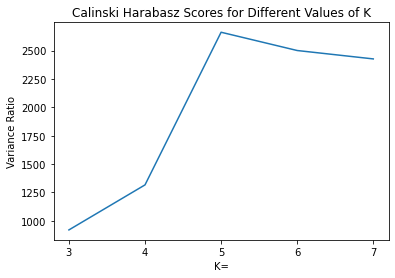

In [10]:
#visualizing our elbow plot of the CH scores
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

That's one metric for evaluating the results; let's take a look at another metric, inertia, also known as Within Cluster Sum of Squares (WCSS).

In [11]:
#create empty list
wcss_score = []

#Loop through models stored in k_list
for model in k_list:
    labels = model.labels_ #For each model, get the labels from the `.labels_` attribute
    wcss_score.append(model.inertia_) #Obtain the `inertia_` attribute from each clustering model and append this value to `wcss_score`

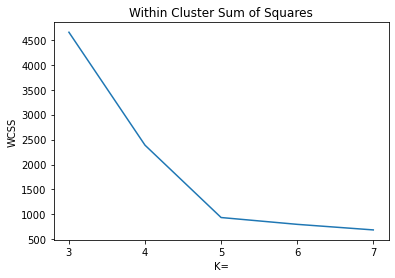

In [12]:
#visualizing our elbow plot of the wss values
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

> There is a clear "elbow" in the CH score graph at 6 clusters, and it looks like there is an elbow at either 5 or 6 clusters as well in the second graph where we're using Within Cluster Sum of Squares as our evaluation metric. With this evidence in hand, let's take a look at the actual number of clusters.

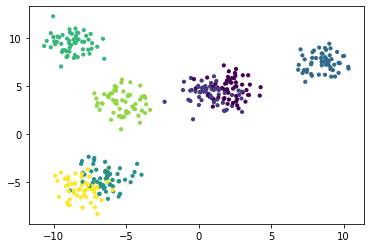

In [13]:
#visualizing the `X_2` dataset we created
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=10);

> We were right! The data does actually contain six clusters. 

> Note that there are other types of metrics that can also be used to evaluate the correct value for $k$, such as the Silhouette score. 

> However, checking the variance ratio by calculating the Calinski Harabasz scores is one of the most tried-and-true methods, and should definitely be one of the first tools you reach for when trying to figure out the optimal value for $k$ with k-means clustering.

> For this example, we were able to visualize our data because it only contained two dimensions. In the real world, working with datasets with only two dimensions is quite rare. This means that you can't always visualize your plots to double-check your work.

> For this reason, it's extra important to be considerate about the metrics you use to evaluate the performance of your clustering algorithm since you won't be able to "eyeball" it and visually check how many clusters the data looks like it has when you're working with datasets that contain hundreds of dimensions!

## 2. Hierarchical Agglomerative Clustering

In [14]:
#Importing necessary libraries
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import pandas as pd
%matplotlib inline 

To understand how hierarchical clustering works, we'll look at a dataset with 16 data points that belong to 3 clusters. 

Run the cell below to create and visualize this dataset. As with the dataset we created in our k-means lab, our visualization will use different colors to differentiate the clusters. 

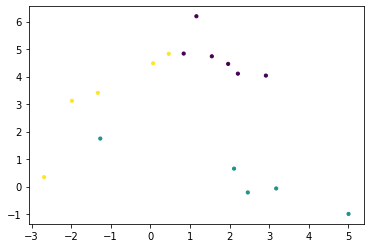

In [15]:
k = 3
m = 16

X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=1.3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

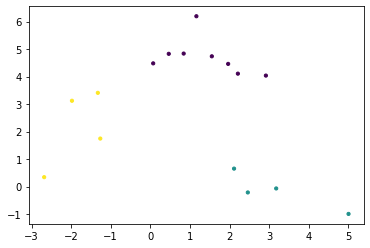

In [16]:
#Instantiate an `AgglomerativeClustering` object and set the number of clusters it will stop at to 3 
agg_clust = AgglomerativeClustering(n_clusters=3)

#Fit the clustering object to the data and then assign predictions for each point 
assigned_clust = agg_clust.fit_predict(X)

#Visualize the data with the color signifying the predictions made by our clustering algorithm
plt.scatter(X[:, 0], X[:, 1], c=assigned_clust, s=10);

> **As you can see the algorithm did pretty well. It got a couple points wrong, but the ones it got wrong seem reasonable, in that they are very close to other clusters.**

In [ ]:
#Visualizing how HAC works
from plot_agg_alg import plot_agglomerative_algorithm

In [ ]:
plot_agglomerative_algorithm()

In [ ]:
from plot_agg import plot_agglomerative # File in the repo

In [ ]:
plot_agglomerative()

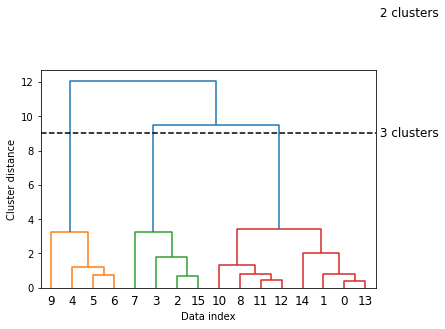

In [24]:
#Dendograms
from scipy.cluster.hierarchy import dendrogram, ward

# Use the ward() function
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel('Data index')
plt.ylabel('Cluster distance')
plt.show()

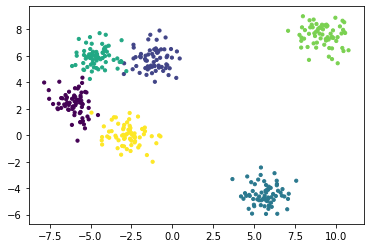

In [25]:
#Going back to the 6 cluster dataset and applying HAC
k = 6
m = 400
X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=0.8,  random_state=1234)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

Now, we'll create 3 different versions of the HAC algorithm, and see how different linkage setting affect the performance of each.

Run the cell below to create these objects, fit each to the dataset we created, and generate predictions from each.

In [26]:
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=6)
agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=6)
agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=6)

as_comp = agg_comp.fit_predict(X)
as_avg = agg_avg.fit_predict(X)
as_ward = agg_ward.fit_predict(X)

Let's start by visualizing the predictions made by the model using `'linkage=complete'`:

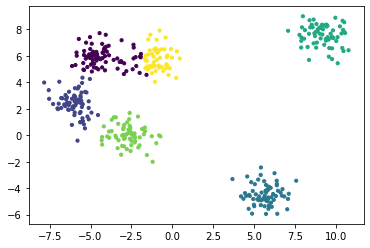

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=as_comp, s=10);

Now, `linkage='average'`:

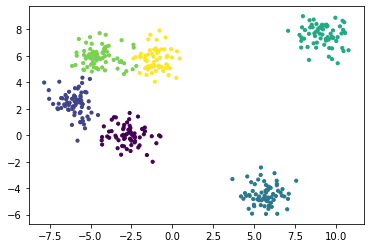

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=as_avg, s=10);

And finally, `linkage='ward'`:

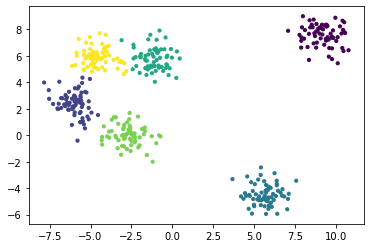

In [29]:
plt.scatter(X[:, 0], X[:, 1], c = as_ward, s = 10);

The results all look pretty similar, except for some small differences in the two upper left clusters.

Now, let's look at the dendrogram for the ward cluster.

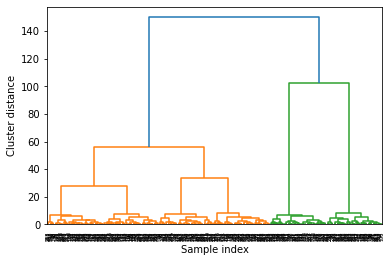

In [30]:
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

We have 400 cases here, which makes the dendrogram look messy. We're mostly interested in the last few clusters anyway. Let's truncate the diagram to make it more interpretable and see how it looks.

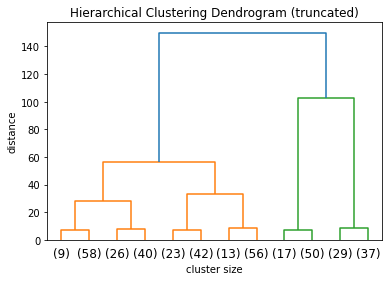

In [31]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(linkage_array,  truncate_mode='lastp', p=12)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

**Evaluation** Now let’s run a k-means clustering algorithm and compare its performance to the hierarchical clustering algorithms.

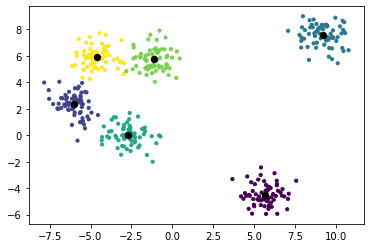

In [32]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 6)
k_means.fit(X)
y_hat = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 10)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=40);

We have ran 4 algorithms in total now, all stored as follows:

`k_means`, `agg_comp`, `agg_avg`, `agg_ward`

By accessing the `.labels` attribute for each of them, you get the array with associated cluster labels. Because we generated the data, we can actually compare these with the actual cluster labels, stored in `y`.

In [33]:
labels_kmeans = k_means.labels_
labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_ward = agg_ward.labels_

Note that for each algorithm, the same cluster, let's say on the upper left, might be labeled differently -- in some, it might be cluster "1", while in other instances, cluster "3". Luckily, the evaluation algorithms in scikit-learn take this into account, so we can go ahead and compare them without worrying about it. 

We've already seen one or two of these metrics before -- let's take this opportunity to quickly see some other metrics that can be used to evaluate cluster fitness, as well. 

Run the cells below to see how each of the four algorithms we fit to the data compare.

**_NOTE:_** Don't worry about memorizing each of these metrics -- just be aware that they exist. It's better to pick one (such as variance ratio) and use it reliably. You'll likely only break out the other metrics for special cases, or when you want a second opinion, as opposed to just going with the metric you usually use!


The **Adjusted Rand Index** [Adjusted Rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) computes a similarity measure between two different clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters predicted, and the true clusterings, before adjusting for random chance. Note that the true labels must be known for this metric to be used. 

The Adjusted Rand index is bounded between -1 and 1. Closer to 1 is good, while closer to -1 is bad. 

In [34]:
from sklearn import metrics

In [35]:
metrics.adjusted_rand_score(labels_kmeans, y)  

0.9700191267241777

In [36]:
metrics.adjusted_rand_score(labels_ward, y)

0.9701102539985723

In [37]:
metrics.adjusted_rand_score(labels_avg, y) 

0.9532034914705111

In [38]:
metrics.adjusted_rand_score(labels_comp, y)  

0.9124580390976879

The **Fowlkes-Mallows score** [Fowlkes-Mallows score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html) measures the similarity for two clusters as a set of points by calculating the geometric mean between precision and recall. Note that the true labels must be known for this metric to be used. 

This score is bounded between 0 and 1. Closer to 1 is better.

In [39]:
metrics.fowlkes_mallows_score(labels_kmeans, y) 

0.9749543352953763

In [40]:
metrics.fowlkes_mallows_score(labels_ward, y)

0.9750304619710456

In [41]:
metrics.fowlkes_mallows_score(labels_avg, y) 

0.9609163225853565

In [42]:
metrics.fowlkes_mallows_score(labels_comp, y) 

0.9269904799684048

The **Calinski-Harabasz Index** [Calinski-Harabasz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) is a variance ratio measurement which measures the ratio between within-cluster dispersion and between-cluster dispersion. You'll often hear this metric referred as "variance ratio". 

This score is not bounded. The higher, the better. 

In [43]:
metrics.calinski_harabasz_score(X, labels_kmeans) 

3174.114962487821

In [44]:
metrics.calinski_harabasz_score(X,labels_ward)

3138.607529679967

In [45]:
metrics.calinski_harabasz_score(X,labels_avg)  

3074.3514930868614

In [46]:
metrics.calinski_harabasz_score(X,labels_comp)  

2865.422513540867

Finally, **Silhouette coefficient** [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is calculated using the mean intra-cluster distance, as well as the mean distance to the nearest cluster for each sample in the dataset. Note that the function below returns the mean Silhouette score for all samples, but you can also use it to get the Silhouette coefficient for a single point, in case you want to judge the fit of a single point in a cluster. 

This metric is bounded between -1 and 1. Closer to -1 suggests incorrect clustering, while closer to +1 shows that each cluster is very dense. 

In [47]:
metrics.silhouette_score(X, labels_kmeans)

0.6933893339039693

In [48]:
metrics.silhouette_score(X, labels_ward) 

0.6900802954648233

In [49]:
metrics.silhouette_score(X,labels_avg)  

0.6836833952775418

In [50]:
metrics.silhouette_score(X, labels_comp)  

0.662633317088521

## 3. Semi-Supervised Learning and Look-Alike Models

**look-alike models** help us identify more customers or market segments that we can plausibly assume are equally valuable, due to their similarity with valuable customers or market segments we've already identified.

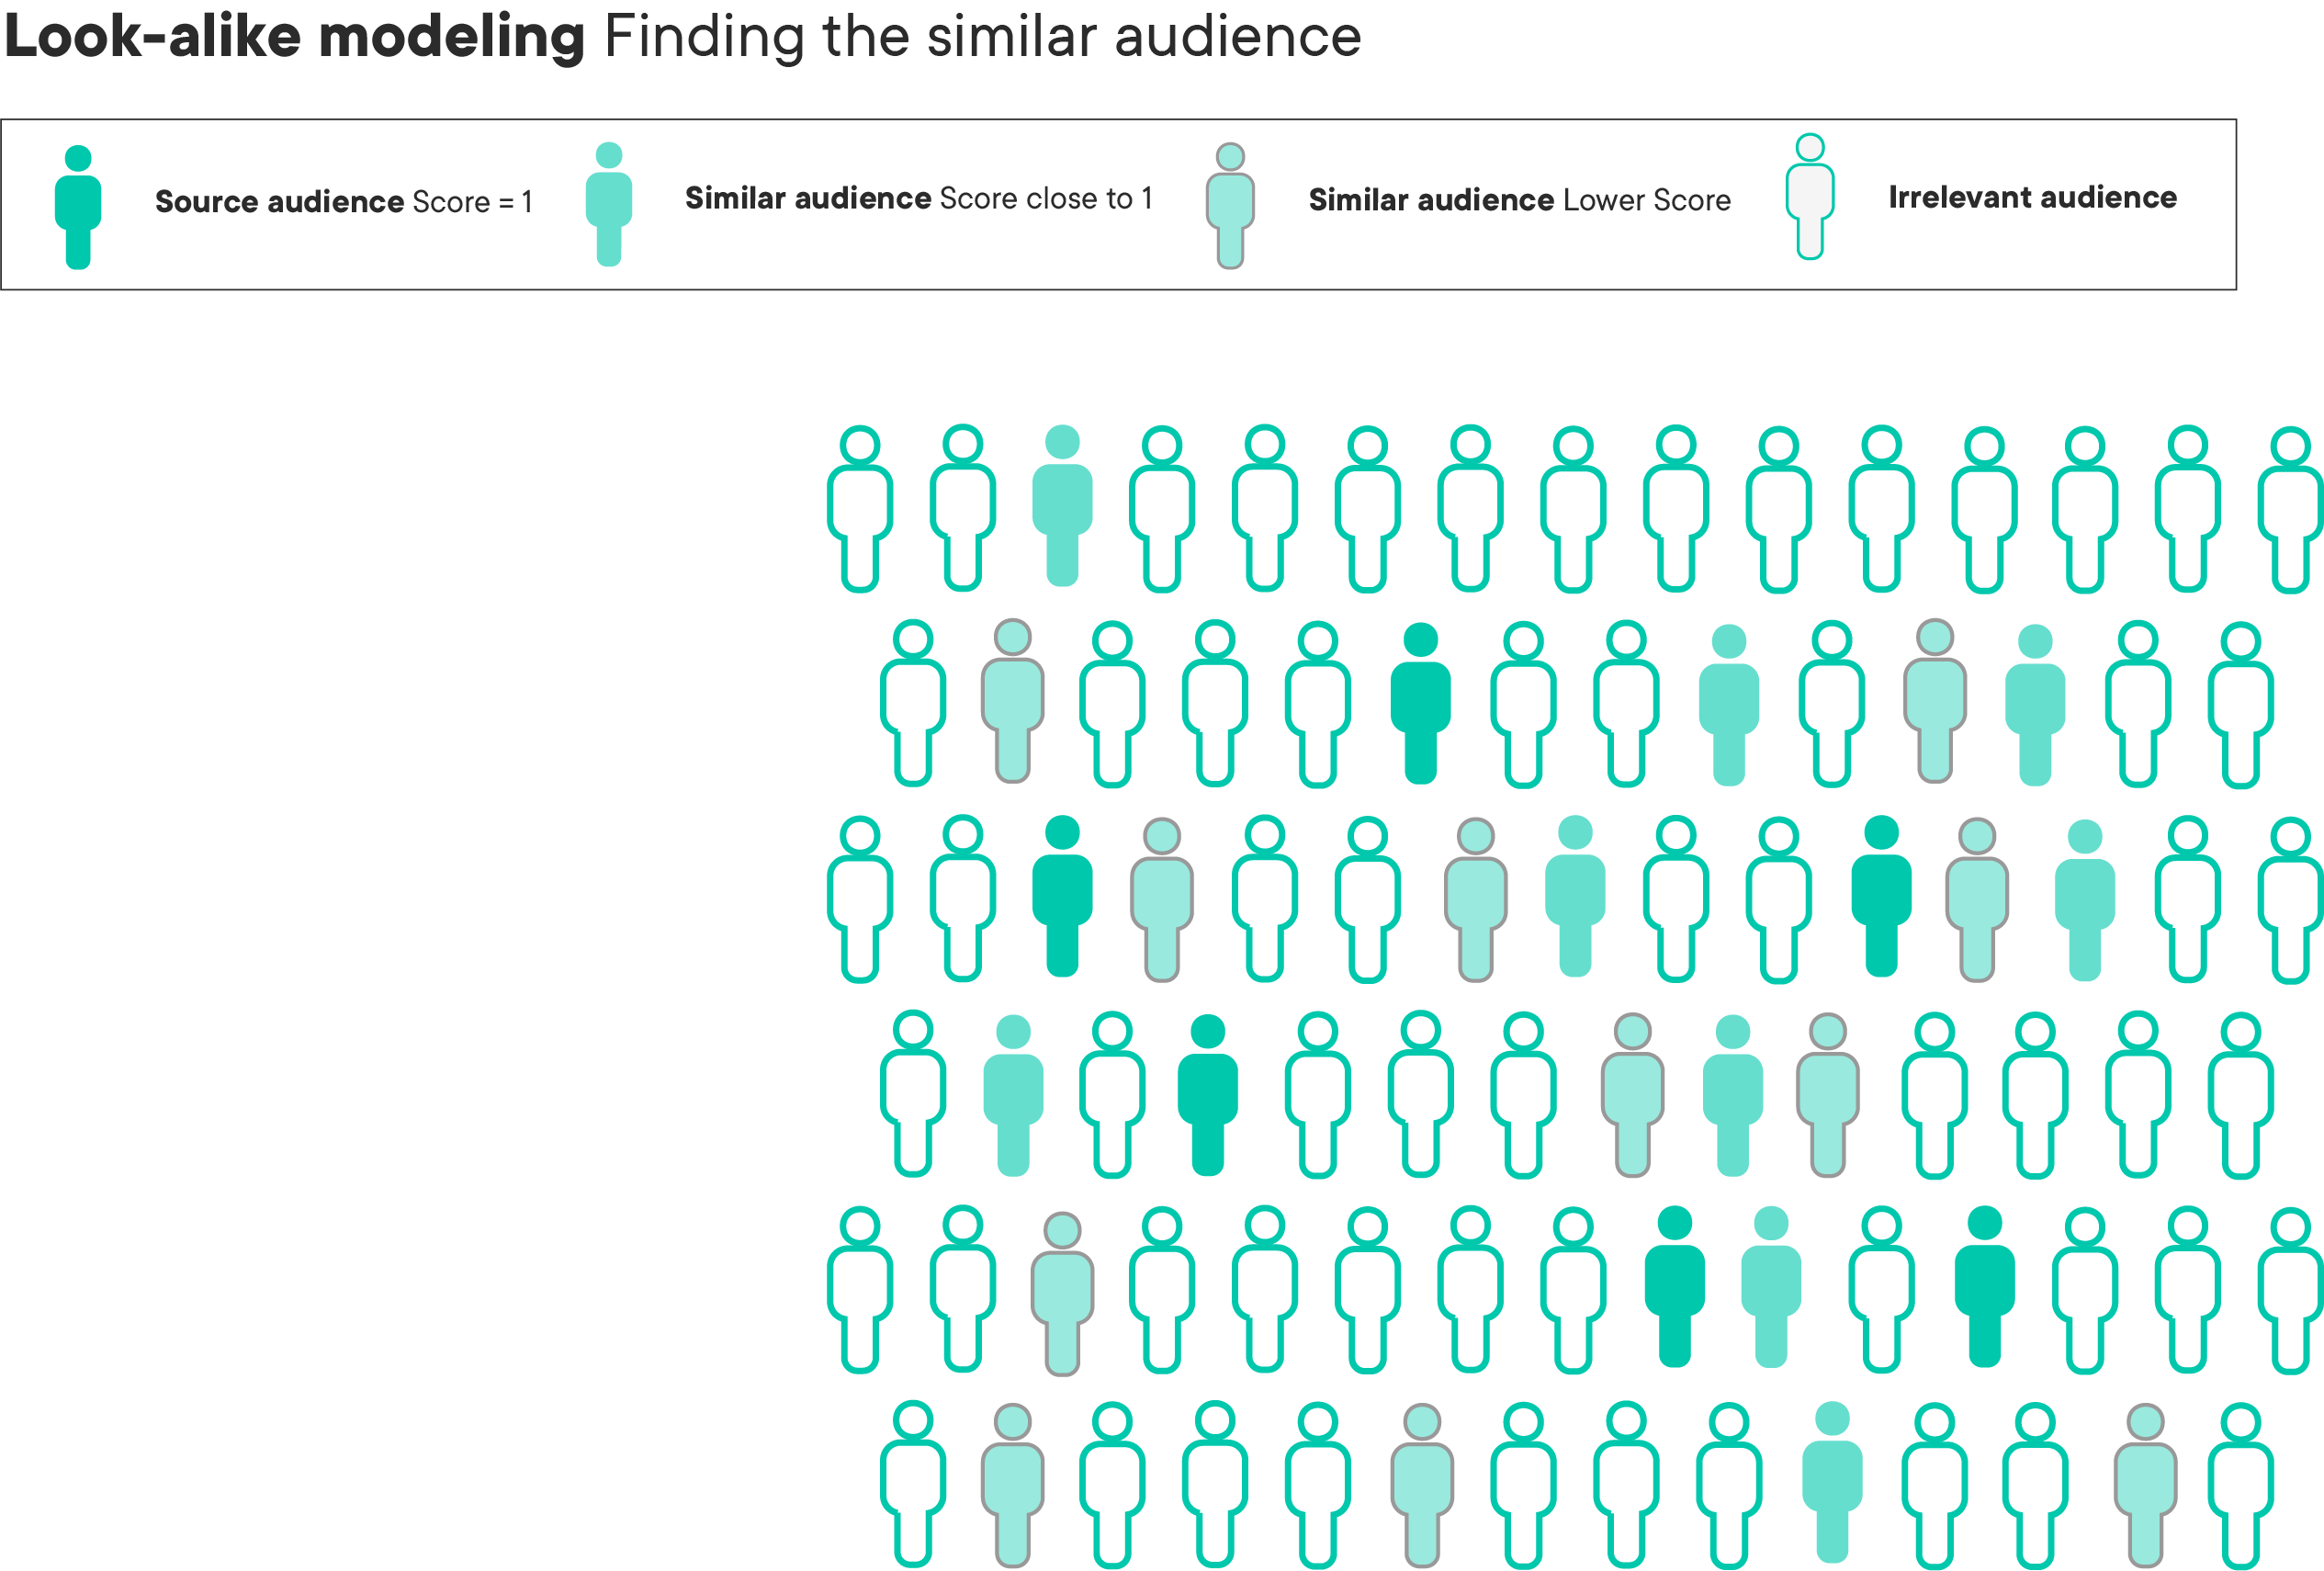

The second use case we'll talk about combines supervised and unsupervised learning to allow us access to more (pseudo) labeled data so that we can better train our **_supervised learning models_**. This technique is called **_semi-supervised learning_**. You may also hear it commonly referred to as weakly supervised learning, but it means the same thing.

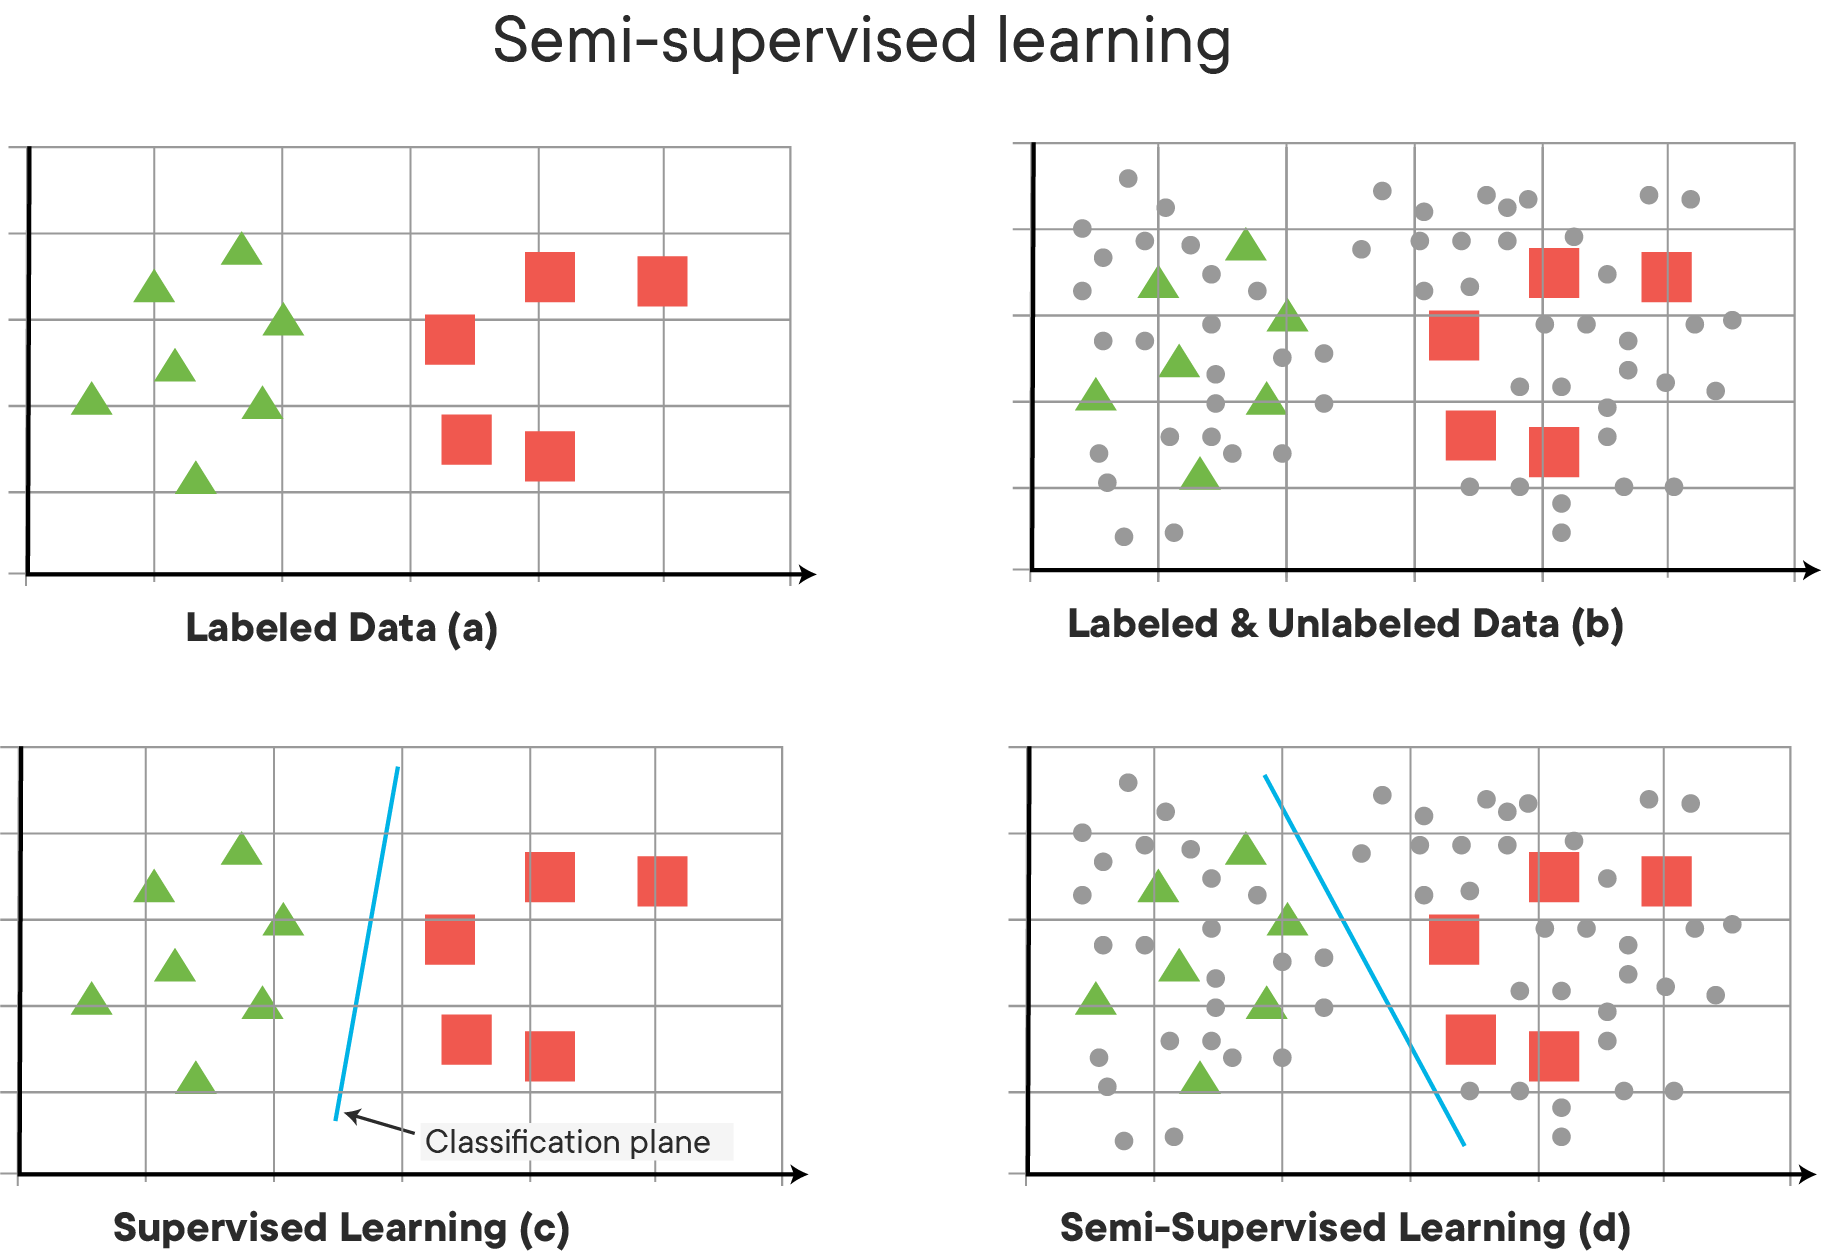

f semi-supervised learning sounds a bit risky to you, you're not wrong. When done correctly, semi-supervised learning can increase overall model performance by opening up access to much more data than we would have access to, and more data almost always results in better performance, but without the exorbitant costs of paying to have humans generate labels for the data needed.


# Market Segmentation with Clustering (Wholesale Customers Dataset)

**Market Segmentation** refers to using **Cluster Analysis** to segment a customer base into different market segments using the various clustering techniques.

By identifying segments in our customer data, we can look for trends that identify one group or another, and create personalized regression models for each group.

In [51]:
#Importing necessary libraries
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#Load our dataset
raw_df = pd.read_csv('wholesale_customers_data.csv')
raw_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Now, let's go ahead and store the `'Channel'` column in a separate variable and then drop both the `'Channel'` and `'Region'` columns. Then, display the first five rows of the new DataFrame to ensure everything worked correctly.

In [53]:
channels = raw_df['Channel']
df = raw_df.drop(['Channel',  'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [54]:
#Starting our clustering analysis
from sklearn.cluster import KMeans

In [55]:
#Instantiate model
k_means = KMeans(n_clusters=2)

#Fit Model
k_means.fit(df)

#Generate predictions
cluster_preds = k_means.predict(df)

In [56]:
#Checking performance
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score

In [57]:
#CH Score to get variance ratio
calinski_harabasz_score(df, cluster_preds)

171.68461633384186

Although you don't have any other numbers to compare this to, this is a pretty low score, suggesting that the clusters aren't great. 

Since you actually have ground-truth labels, in this case you can use `adjusted_rand_score()` to check how well the clustering performed. Adjusted Rand score is meant to compare two clusterings, which the score can interpret our labels as. This will tell us how similar the predicted clusters are to the actual channels. 

Adjusted Rand score is bounded between -1 and 1. A score close to 1 shows that the clusters are almost identical. A score close to 0 means that predictions are essentially random, while a score close to -1 means that the predictions are pathologically bad, since they are worse than random chance. 

In the cell below, call `adjusted_rand_score()` and pass in `channels` and `cluster_preds` to see how well your first iteration of clustering performed. 

In [58]:
adjusted_rand_score(channels, cluster_preds)

-0.03060891241109425

> **According to these results, the clusterings were essentially no better than random chance. Let's see if you can improve this.**

Noting that k-means clustering is heavily affected by scaling. Since the clustering algorithm is distance-based, this makes sense.

In [59]:
#Scaling our dataset
#Import and instantiate StandardScaler and use it to transform the dataset
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df) 

In [60]:
#Instantiate k-means
scaled_k_means = KMeans(n_clusters=2)

#fit k-means to scaled data
scaled_k_means.fit(scaled_df)

#predict clusters
scaled_preds = scaled_k_means.predict(scaled_df)

In [61]:
#Calculate the adjusted Rand score for these new predictions
adjusted_rand_score(channels, scaled_preds)

0.212843835451224

> **That's a big improvement! Although it's not perfect, we can see that scaling our data had a significant effect on the quality of our clusters.**

Since clustering algorithms are distance-based, this means that dimensionality has a definite effect on their performance. The greater the dimensionality of the dataset, the greater the total area that we have to worry about our clusters existing in. Let's try using Principal Component Analysis to transform our data and see if this affects the performance of our clustering algorithm.

Your overall goal here is to get the highest possible adjusted Rand score. Don't be afraid to change parameters and rerun things to see how it changes.

In [62]:
#Import PCA
from sklearn.decomposition import PCA

In [63]:
#Create a PCA instance and use it to transform our scaled data
pca = PCA(n_components=4)
pca_df = pca.fit_transform(scaled_df)

In [64]:
#Investigate the explained variance ratio for each Principal Component. 
#Consider dropping certain components to reduce dimensionality if you feel it is worth the loss of information
np.cumsum(pca.explained_variance_ratio_)

array([0.44082893, 0.72459292, 0.84793705, 0.94189209])

In [65]:
#Create a new KMeans object
pca_k_means = KMeans(n_clusters=2)

#fit it to our PCA-transformed data
pca_k_means.fit(pca_df)

#Make predictions
pca_preds = pca_k_means.predict(pca_df)

In [66]:
#check the adjusted Rand score of the predictions it makes
adjusted_rand_score(channels, pca_preds)

0.13885372763476506

> The highest ARS should be ~0.23, which suggests that the clusters are better than random chance, but far from perfect.

> Overall, the quality of the clustering algorithm did a lot better than the first algorithm we ran on unscaled data. The best performance was achieved when reducing the number of principal components down to 4. The increase in model performance is likely due to the reduction in dimensionality. 

> Although dropping the last 2 PCs means that we lose about 6% of our explained variance, this proved to be a net-positive trade-off for the reduction in dimensionality it provided.

Performing the same using HAC

In [67]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=2)
hac.fit(pca_df)
hac_pca_preds = hac.labels_

In [68]:
adjusted_rand_score(channels, hac_pca_preds)

0.04822381910875346

In [69]:
hac2 = AgglomerativeClustering(n_clusters=2)
hac2.fit(scaled_df)
hac_scaled_preds = hac2.labels_

In [70]:
adjusted_rand_score(channels, hac_scaled_preds)

0.022565317001188977

In [71]:
hac3 = AgglomerativeClustering(n_clusters=2)
hac3.fit(df)
hac__preds = hac3.labels_

In [72]:
adjusted_rand_score(channels, hac__preds)

-0.01923156414375716

We used our knowledge of clustering to perform a market segmentation on a real-world dataset. We started with a cluster analysis with poor performance, and then implemented some changes to iteratively improve the performance of the clustering analysis!